<a href="https://colab.research.google.com/github/dakyommii/AlgorithmReview/blob/main/study/YOLOv5_Object_Detection_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv5 Object Detection 학습

## settings

In [ ]:
%cd /content/drive/MyDrive/seol
# !git clone https://github.com/ultralytics/yolov5.git

/content/drive/MyDrive/seol


In [ ]:
!pip install -qr /content/drive/MyDrive/seol/yolov5/requirements.txt # install dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/seol/datasets/YOLOv5

/content/drive/MyDrive/seol/datasets/YOLOv5


## dataset

### roboflow dataset download

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="o8IhKIIZs84VuK9nEwLz")
project = rf.workspace("dalkkommi-gmail-com").project("tiger-minhwa")
dataset = project.version(10).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to tiger-minhwa-10 in yolov5pytorch:: 100%|██████████| 822/822 [00:05<00:00, 153.08it/s]


### image 경로 설정

In [ ]:
from glob import glob #이미지를 한번에 긁어모으기 위한 glob 모듈

img_list = glob('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/train/images/*.jpg') # 트레인 이미지 경로
test_img_list = glob('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/test/images/*.jpg') # 테스트 이미지 경로
val_img_list=glob('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/valid/images/*.jpg') # validation 이미지 경로

In [ ]:
with open('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/train.txt', 'w') as f:
    f.write('\n'.join(img_list) + '\n')

In [ ]:
with open('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

In [ ]:
with open('/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/valid.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

## train

In [ ]:
!python /content/drive/MyDrive/seol/yolov5/train.py --img 640 --batch 16 --epochs 300 --data /content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/data.yaml --name minhwa-action-test #--weights yolov5x.pt --name result_jetbot --cfg ./models/yolov5x.yaml

train: weights=../../yolov5/yolov5s.pt, cfg=, data=/content/drive/MyDrive/seol/datasets/YOLOv5/tiger-minhwa-10/data.yaml, hyp=../../yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../../yolov5/runs/train, name=minhwa-action-test, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
requirements: /content/drive/MyDrive/seol/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, 

## detection

In [ ]:
# permission denied error 발생시 권한설정
!chmod +x /content/drive/MyDrive/seol/yolov5/detect.py

In [38]:
%cd /content/drive/MyDrive/seol/yolov5

/content/drive/MyDrive/seol/yolov5


In [ ]:
!pwd

/content/drive/MyDrive/seol/yolov5


In [43]:
!python ./detect.py --weights /content/drive/MyDrive/seol/yolov5/runs/train/minhwa-action-test/weights/best.pt --img 640 --source /content/drive/MyDrive/seol/test/yolov5/flower-minhwa

detect: weights=['/content/drive/MyDrive/seol/yolov5/runs/train/minhwa-action-test/weights/best.pt'], source=/content/drive/MyDrive/seol/test/yolov5/flower-minhwa, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/drive/MyDrive/seol/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-147-gaa7c45c Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
image 1/4 /content/drive/MyDrive/seol/test/yolov5/flower-minhwa/hwajodo.jpeg: 640x384 3 flowers, 4 lotuss, 2 morans, 44.2ms
image 2/4 /content/drive/MyDrive/seol/test/yolov5/flow

## 민화 텍스트 출력

In [40]:
# bird set
bird=['bird','chicken','duck','kingfisher','magpie','mandarin-duck','pheasant']

# flower set
flower=['flower','magnolia']

In [41]:
key_lst=[['bird',1], ['branch',1], ['butterfly',1], ['chicken',1], ['duck',1], ['egret',1], ['flower',1], ['grass',1], ['kingfisher',1], ['lotus',1], ['lotus-seed',1], ['magnolia',1], ['magpie',1], ['flying-magpie',1],['mandarin-duck',1], ['moran',1] ,['pheasant',1], ['pheonix',1] ,['rock',1], ['tiger',1]]

In [42]:
key_dic=dict(key_lst)

### 키워드와 위치정보 불러오기

In [44]:
obj=[]  # 추출한 객체 키워드
loc=[]  # 각 객체의 위치정보
f = open('/content/drive/MyDrive/seol/test/yolov5/algo-test.txt', 'r')
lines = f.readlines()
for line in lines:
    r=line.split(' ')
    # print(r)
    arr=[]
    for i in range(0,4):
      # print(r[i])
      if(i%2==0): s=r[i][1:-1]
      else: s=r[i][:-1]
      # s=r[i][1:-1]
      # print(s)
      arr.append(int(s))

    loc.append(arr)
    key=r[4]
    cnt=key_dic[key]
    obj_str=key+'-%d'%cnt

    key_dic[key]+=1
    obj.append(obj_str)
f.close()

In [46]:
loc # 좌상향 x,y, 우하향 x,y - y 값이 0에 가까울수록 위에 있는 object

[[300, 292, 406, 454],
 [183, 112, 322, 199],
 [329, 502, 401, 618],
 [108, 122, 170, 188],
 [301, 292, 405, 449],
 [329, 500, 401, 621],
 [180, 115, 326, 197],
 [355, 117, 419, 183],
 [198, 442, 330, 574]]

In [45]:
obj

['lotus-1',
 'lotus-2',
 'moran-1',
 'lotus-3',
 'flower-1',
 'flower-2',
 'moran-2',
 'lotus-4',
 'flower-3']

### 색깔 정보 추출

In [2]:
import cv2
import imutils
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter

#### 객체별 이미지 저장

In [47]:
out_path='/content/drive/MyDrive/seol/test/yolov5/color-test/'
minhwa=cv2.imread('/content/drive/MyDrive/seol/test/yolov5/flower-minhwa/hwajodo.jpeg',cv2.IMREAD_COLOR)

for i in range(0,len(loc)):
  sx=loc[i][0]
  sy=loc[i][1]
  ex=loc[i][2]
  ey=loc[i][3]

  crop=minhwa[sy:ey,sx:ex]
  fin_path=out_path+str(obj[i])+'_crop.png'

  cv2.imwrite(fin_path,crop)

# plt.imshow(cv2.cvtColor(test,cv2.COLOR_BGR2RGB))


#### 객체별 색상 추출

In [3]:
obj_minhwa=cv2.imread('/content/drive/MyDrive/seol/test/yolov5/color-test/flower-1_crop.png')
obj_minhwa=cv2.cvtColor(obj_minhwa,cv2.COLOR_BGR2RGB)

In [133]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_):
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

In [134]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()


In [135]:
# main_color=''
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)

    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))

    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    # print(k_cluster.cluster_centers_[0][0])
    # color=np.unit8([[k_cluster.cluster_centers_[0]]])
    # main_color=k_cluster.cluster_centers_[0]

    step = 0

    for idx, centers in enumerate(k_cluster.cluster_centers_):
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)

    return palette


In [8]:
clt=KMeans(n_clusters=5)

In [9]:
clt_1 = clt.fit(obj_minhwa.reshape(-1, 3))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
width = 300
palette = np.zeros((50, width, 3), np.uint8)

n_pixels = len(clt_1.labels_)
counter = Counter(clt_1.labels_) # count how many pixels per cluster
perc = {}
for i in counter:
    perc[i] = np.round(counter[i]/n_pixels, 2)
perc = dict(sorted(perc.items(),reverse=True))

#for logging purposes
print(perc)
print(clt_1.cluster_centers_)
# print(k_cluster.cluster_centers_[0][0])
# color=np.unit8([[k_cluster.cluster_centers_[0]]])
# main_color=k_cluster.cluster_centers_[0]

step = 0

for idx, centers in enumerate(clt_1.cluster_centers_):
    palette[:, step:int(step + perc[idx]*width+1), :] = centers
    step += int(perc[idx]*width+1)


{4: 0.1, 3: 0.09, 2: 0.27, 1: 0.41, 0: 0.13}
[[199.70669746 166.15750577  93.86789838]
 [234.09520976  35.6219875   30.44123773]
 [192.24009164  40.49690722  25.74272623]
 [242.52513228 213.40608466 147.13888889]
 [135.05242967 116.65792839  63.45204604]]


In [17]:
perc = dict(sorted(perc.items(),key = lambda item: item[1],reverse=True))
perc

{1: 0.41, 2: 0.27, 0: 0.13, 4: 0.1, 3: 0.09}

In [18]:
idx = list(perc.keys())[0]
idx

1

In [22]:
# perc = dict(sorted(perc.items()))
# perc
r=clt_1.cluster_centers_[int(idx)][0]
g=clt_1.cluster_centers_[int(idx)][1]
b=clt_1.cluster_centers_[int(idx)][2]
color=np.uint8([[int(b),int(g),int(r)]])
bgr_color=cv2.cvtColor(color,cv2.COLOR_BGR2HSV)

error: ignored

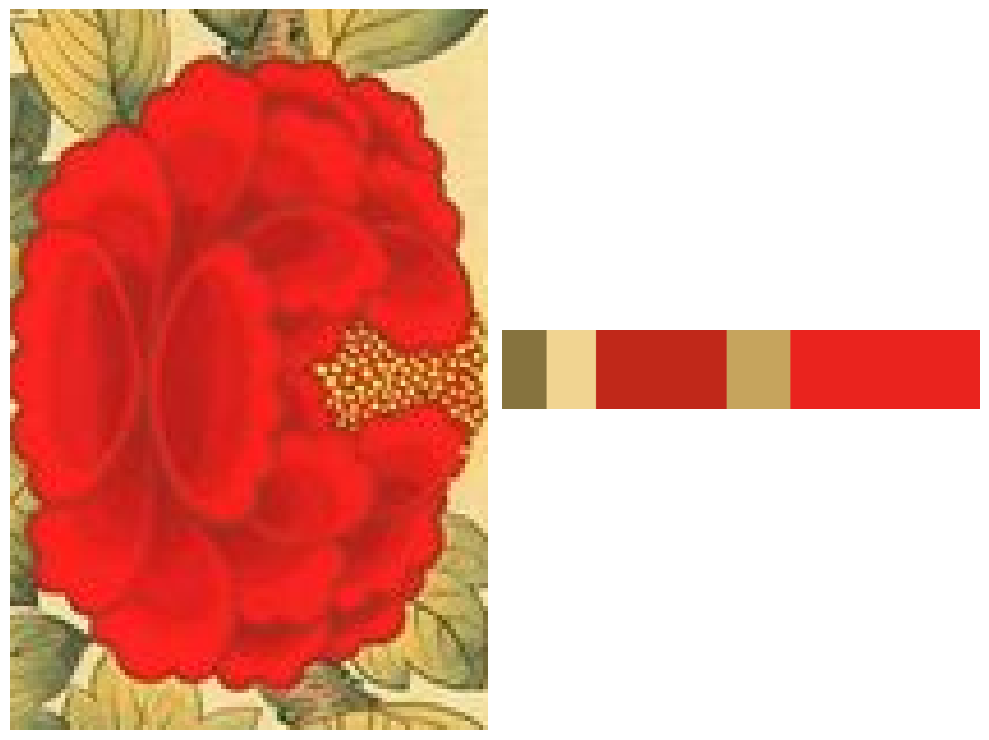

In [141]:
# clt_1 = clt.fit(obj_minhwa.reshape(-1, 3))
show_img_compar(obj_minhwa, palette)


In [50]:
obj_minhwa=cv2.imread('/content/drive/MyDrive/seol/test/yolov5/color-test/flower-1_crop.png')
obj_hsv = cv2.cvtColor(obj_minhwa, cv2.COLOR_BGR2HSV)
obj_hsv

array([[[ 22, 130, 179],
        [ 22, 139, 167],
        [ 22, 142, 162],
        ...,
        [ 27, 100, 105],
        [ 26, 164,  76],
        [ 24, 125, 116]],

       [[ 21,  89, 241],
        [ 22,  97, 216],
        [ 23,  92, 239],
        ...,
        [ 27, 132,  87],
        [ 25, 126, 105],
        [ 24,  69, 222]],

       [[ 22, 109, 184],
        [ 23, 118, 168],
        [ 23, 128, 172],
        ...,
        [ 26, 113, 115],
        [ 24,  64, 226],
        [ 25,  62, 255]],

       ...,

       [[ 25, 123, 181],
        [ 25, 123, 176],
        [ 27, 128, 159],
        ...,
        [ 23,  96, 225],
        [ 23,  89, 244],
        [ 23,  93, 237]],

       [[ 24, 131, 173],
        [ 26, 128, 172],
        [ 27, 123, 164],
        ...,
        [ 23, 154, 146],
        [ 23, 106, 212],
        [ 23,  87, 252]],

       [[ 24, 133, 172],
        [ 25, 123, 180],
        [ 27, 125, 161],
        ...,
        [ 23, 117, 203],
        [ 22, 167, 139],
        [ 23, 105, 214]]

### 객체별 중앙 좌표 계산

In [ ]:
mid=[]  # 각 객체 중앙 x, y 좌표
for i in range(0,len(loc)):
  sx=loc[i][0]
  sy=loc[i][1]
  ex=loc[i][2]
  ey=loc[i][3]

  p=((sx+ex)/2,(sy+ey)/2)
  mid.append(p)

In [ ]:
mid

[(401.5, 28.5), (273.5, 599.5), (292.0, 178.0), (270.5, 314.0)]

### 민화 분류 텍스트 출력

In [ ]:
if "tiger" in obj: print("This minhwa is Hojakdo.")
elif "moran" in obj: print("This minhwa is Morando.")
elif "lotus" in obj: print("This minhwa is Yeonhwado.")
elif "egret" in obj: print("This minhwa is Songhakdo.")
elif "pheonix" in obj: print("This minhwa is Bonghwangdo.")
elif any(x in obj for x in bird):
  if any(a in obj for a in flower): print("This minhwa is Hwajodo.")
  else: print("undefined Minhwa")
else: print("undefined Minhwa")

This minhwa is Hojakdo.


### 인식한 객체를 문장으로 출력

In [ ]:
for i in range(0,len(obj)):
  print("There is a "+obj[i]+" in Minhwa.")

There is a branch in Minhwa.
There is a tiger in Minhwa.
There is a tiger in Minhwa.
There is a magpie in Minhwa.


### 객체 간 위치관계 포함한 문장 출력

In [ ]:
for i in range(0,len(mid)):
  cur=obj[i]
  for j in range(0,len(mid)):
    if(i==j): continue

    cp=obj[j]#상대 객체
    # 현재 객체가 위에 있음
    if(mid[i][1]<mid[j][1]): print("There is a "+cur+" on the "+cp+".")
    # 현재 객체가 아래에 있음
    if(mid[i][1]>mid[j][1]): print("There is a "+cur+" under the "+cp+".")

There is a branch on the tiger.
There is a branch on the tiger.
There is a branch on the magpie.
There is a tiger under the branch.
There is a tiger under the tiger.
There is a tiger under the magpie.
There is a tiger under the branch.
There is a tiger on the tiger.
There is a tiger on the magpie.
There is a magpie under the branch.
There is a magpie on the tiger.
There is a magpie under the tiger.


In [ ]:
# a = set([1, 2])
# b = set([1, 2, 3])
# a.issubset(b)  # True
# b.issuperset(a)  # True

In [ ]:
# lst1 = [1, 2, 3, 5, 6]
# lst2 = [1, 2]
# if all(x in lst1 for x in lst2):
#     print("contains")
# else:
#     print("not contains")

In [ ]:
# t1=(1,2)
# t2=(2,3)
# test=[]
# test.append(t1)
# test.append(t2)

### 예시 이미지

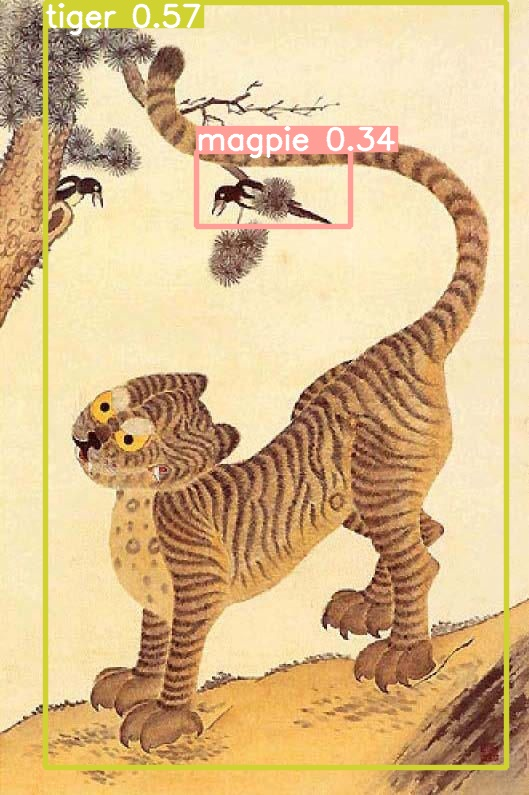

In [ ]:
import glob
import random
from IPython.display import Image,display

image_name=random.choice(glob.glob('/content/drive/MyDrive/seol/yolov5/runs/detect/exp2/*.jpg'))
display(Image(filename=image_name))